In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings("ignore")                                                #忽略警告

brasize = pd.read_csv(r'C:\Users\admin\Desktop\data\bra\bra.csv')                #反斜杠 之前需要加转义字符
bracolor= pd.read_csv('C:/Users/admin/Desktop/data/bra/colors.csv')              #正斜杠（除号符号） web网址

# brasize.info()
# bracolor.info()

In [2]:
bracolor.head(5)                                                                           #显示bracolor的前五列

,Unnamed: 0,0,1
0,0,22咖啡色,棕色
1,1,02粉色,粉色
2,2,071蓝色,蓝色
3,3,071黑色,黑色
4,4,071肤色,肤色


In [ ]:
## 将两个dateframe进行merge

In [3]:
bramerge = pd.merge(brasize,bracolor,left_on="productColor",right_on="0")                    #使用merge将两个CSV文件进行合并 
bramerge.head(10)                                                                            #合并后dataframe的前十项           

,creationTime,productColor,productSize,Unnamed: 0,0,1
0,2016-06-08 17:17:00,22咖啡色,75C,0,22咖啡色,棕色
1,2017-04-07 19:34:25,22咖啡色,80B,0,22咖啡色,棕色
2,2017-08-03 20:39:18,22咖啡色,80B,0,22咖啡色,棕色
3,2016-07-06 14:02:08,22咖啡色,75B,0,22咖啡色,棕色
4,2017-03-18 11:49:55,22咖啡色,80B,0,22咖啡色,棕色
5,2017-01-13 13:43:06,22咖啡色,80B,0,22咖啡色,棕色
6,2016-07-10 22:22:56,22咖啡色,80B,0,22咖啡色,棕色
7,2016-07-15 14:34:23,22咖啡色,80B,0,22咖啡色,棕色
8,2017-03-27 12:54:43,22咖啡色,70C,0,22咖啡色,棕色
9,2016-06-19 10:38:05,22咖啡色,80C,0,22咖啡色,棕色


In [4]:
bramerge["productSize"]

0            75C
1            80B
2            80B
3            75B
4            80B
          ...   
15492    34A/75A
15493    34B/75B
15494    34A/75A
15495    36C/80C
15496    34B=75B
Name: productSize, Length: 15497, dtype: object

In [5]:
bramerge.rename(columns ={'1': 'color'}, inplace = True)                      #默认inplace为false创建一个新的DF，这里在原来DF上修改索引和columns，
                                                                               #不建立新的DF，inplace选择true
bramerge

,creationTime,productColor,productSize,Unnamed: 0,0,color
0,2016-06-08 17:17:00,22咖啡色,75C,0,22咖啡色,棕色
1,2017-04-07 19:34:25,22咖啡色,80B,0,22咖啡色,棕色
2,2017-08-03 20:39:18,22咖啡色,80B,0,22咖啡色,棕色
3,2016-07-06 14:02:08,22咖啡色,75B,0,22咖啡色,棕色
4,2017-03-18 11:49:55,22咖啡色,80B,0,22咖啡色,棕色
...,...,...,...,...,...,...
15492,2017-11-03 16:39:13,粉色套装（含内裤）,34A/75A,116,粉色套装（含内裤）,粉色
15493,2017-11-07 23:03:10,粉色套装（含内裤）,34B/75B,116,粉色套装（含内裤）,粉色
15494,2017-11-14 17:25:37,粉色套装（含内裤）,34A/75A,116,粉色套装（含内裤）,粉色
15495,2017-11-11 00:13:32,粉色套装（含内裤）,36C/80C,116,粉色套装（含内裤）,粉色


In [6]:
bra_merge = bramerge[['creationTime', 'color', 'productSize']]       #提取bramerge的reationTime,color,productSize列
bra_merge

,creationTime,color,productSize
0,2016-06-08 17:17:00,棕色,75C
1,2017-04-07 19:34:25,棕色,80B
2,2017-08-03 20:39:18,棕色,80B
3,2016-07-06 14:02:08,棕色,75B
4,2017-03-18 11:49:55,棕色,80B
...,...,...,...
15492,2017-11-03 16:39:13,粉色,34A/75A
15493,2017-11-07 23:03:10,粉色,34B/75B
15494,2017-11-14 17:25:37,粉色,34A/75A
15495,2017-11-11 00:13:32,粉色,36C/80C


## 设置正则表达式

In [7]:
re_1 = re.compile(r'[7-9]\d[A-Z]',re.I)                             #re.compile()设置正则表达式 匹配[7-9]\d[A-Z] 正则表达式是一种匹配方式
re_2 = re.compile(r'[A-Z][7-9]\d',re.I)                             #匹配"[A-Z][7-9]\d
re_3 = re.compile(r'\d[2].\d[2][A-Z]',re.I)                         #匹配\d[2].\d[2][A-Z]

## 数据清洗

In [8]:
for i in range(len(bra_merge)):                                       #遍历productSize一列
    try:                                                              #遇到错误运行continue
        re_list_one = re_1.findall(bra_merge.loc[i,"productSize"])     #利用正则表达式在bra_merge找到匹配的样式 使用 正则表达式.findall()
        re_list_two = re_2.findall(bra_merge.loc[i,"productSize"])     #使用loc（）函数获取DF上的值
        re_list_three = re_3.findall(bra_merge.loc[i,"productSize"])   
        if re_list_one:
            bra_merge["productSize"][i] = re_list_one[0]
        if re_list_two:
            bra_merge["productSize"][i] = re_list_two[0][1:3] + re_list_two[0].upper()       #例如将A70变为70A
        if re_list_three:
            bra_merge["productSize"][i] = re_list_three[0][-2:-4:-1] + re_list_three[0][-1].upper() 
        else:
            continue
    except:
        continue          

In [9]:
bra_merge['productSize']

0        75C
1        80B
2        80B
3        75B
4        80B
        ... 
15492    75A
15493    75B
15494    75A
15495    80C
15496    75B
Name: productSize, Length: 15497, dtype: object

In [10]:
bra_merge.tail(10)

,creationTime,color,productSize
15487,2017-10-29 09:14:45,紫色,70A
15488,2017-11-12 20:18:37,紫色,80C
15489,2017-11-12 16:48:10,紫色,80C
15490,2017-11-17 10:30:42,紫色,75B
15491,2017-07-27 23:07:21,紫色,75B
15492,2017-11-03 16:39:13,粉色,75A
15493,2017-11-07 23:03:10,粉色,75B
15494,2017-11-14 17:25:37,粉色,75A
15495,2017-11-11 00:13:32,粉色,80C
15496,2016-12-20 13:51:34,粉色,75B


## 统计colors与productSize各类别数目

In [11]:
bracolor_count = bra_merge["color"].value_counts()             # (columns).value_counts() 记数
bracolor_count

蓝色    3423
红色    2715
紫色    2505
肤色    2169
黑色    2142
粉色    2000
黄色     268
灰色     126
绿色      97
棕色      51
Name: color, dtype: int64

In [12]:
brasize_count = bra_merge["productSize"].value_counts()
brasize_count

75B          6495
80B          3623
85B           972
75B75         459
70B           417
75D           360
80C           352
80B80         345
75A           326
85C           244
80C80         229
80A           198
75C           194
70A           170
75C75         162
165/76/L      152
160/70/M      113
75A75          98
85A            78
170/82/XL      75
80A80          72
75a            64
70B70          42
90C            39
85B85          26
85A85          21
90D            21
90B            20
85D            20
80D            18
70C            18
85E            17
85C85          13
70C70           9
80E             8
75E             5
95D             4
95C             4
90A             4
90E             3
85/38C          2
95E             1
85a             1
75c             1
70A70           1
Name: productSize, dtype: int64

## 绘制colors柱形图

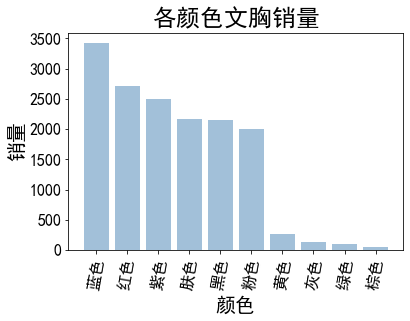

In [13]:
x_axis = bracolor_count.keys()                                   #获取bracolor_count中的键                  
color_num = bracolor_count.values                                #获取bracolor_count中的值
x_label = x_axis                                                 
x_var = np.arange(len(x_axis))
plt.title("各颜色文胸销量",fontsize=24)                          #图的名称 plt.title()
plt.xlabel("颜色", fontsize = 20)                                #x,y轴的名称 plt.xlabel()/plt.ylabel()
plt.ylabel("销量",fontsize = 20)
plt.xticks(x_var, x_label, rotation = 80, fontsize = 16)
plt.yticks(fontsize = 16)
plt.bar(x_var,color_num, align = 'center',color="steelblue" ,alpha = 0.5)
plt.show()

## 绘制size柱形图

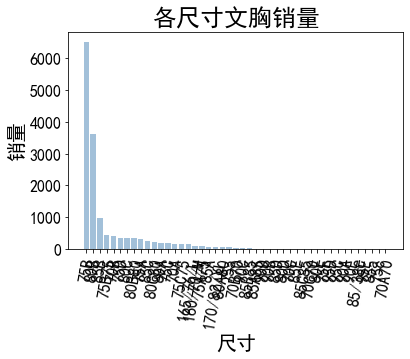

In [14]:
x_axis = brasize_count.keys()
size_num = brasize_count.values
x_label = x_axis
x_var = np.arange(len(x_axis))
plt.title("各尺寸文胸销量",fontsize=24)
plt.xlabel("尺寸",fontsize=20)
plt.ylabel("销量",fontsize=20)
plt.xticks(x_var, x_label, rotation = 80, fontsize = 16)
plt.yticks(fontsize = 16)
plt.bar(x_var,size_num, align = 'center',color="steelblue" ,alpha = 0.5)
plt.show()